# 事前環境設定

In [5]:
# ライブラリの読み込み
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# グラフをインラインで表示させる
%matplotlib inline

・分析に利用するライブラリをインストールする

# 入出力

## 分析用データの読込

### Pandasはデータの入出力や加工のライブラリ。データフレームという考え方で、Excelのピボットテーブルのように集計や、より複雑な加工が出来ます。

・Pythonのカレントディレクトリを確認し、分析利用データ（train.csv）をコピーします。

In [2]:
os.getcwd()

'/Users/mi-tomoya/Documents/jupyter-notebook/HousePrices_Data'

・分析利用データ（train.csv）を読込ます。read_csv()でデータ読込。 必要に応じ、delimiterで区切り文字を指定する。デフォルトでは","。<br>
・df_train = pd.read_csv('カレントディレクトリ/ファイル名', delimiter=",") ）

In [3]:
df_train = pd.read_csv('./train.csv')

### 読み込んだデータをチェックします。<br>
チェックのポイント<br>
 ①データを俯瞰（先頭/末尾）<br>
 ②データの行数・列数は正しいか？<br>
 ③データの項目が正しいか？<br>
 ④データ型は適切か？<br>

In [6]:
# ①データを俯瞰（先頭）
df_train.head(3)  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
# ①データを俯瞰（末尾）
df_train.tail()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
#②データの行数・列数は正しいか？
df_train.shape

(1460, 81)

In [9]:
#③データの項目が正しいか？
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#④データ型は適切か？
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# データの抽出・加工

基本的なデータ型とデータ構造と制御構造については、以下URLを参照ください。 <br>
http://www.geocities.jp/m_hiroi/light/python01.html

データの抽出、加工の詳細については、以下URLを参照ください。<br>
Pandas でデータフレームを扱う<br>
http://pythondatascience.plavox.info/pandas

# データの集計

・データの現状を把握すべく、各変数の平均や標準偏差などの代表値（基本統計量）を算出したり、可視化（グラフ）します。<br>

・まずは予測したい対象（目的変数）であるSalePriceを見てみましょう。（変数を指定しない場合、データフレーム全体を結果として戻します。）<br>
※各種統計量の算出方法は以下を参照（P12）<br>
https://www.slideshare.net/DataScientist_JP/01-python

In [11]:
#平均
df_train.SalePrice.mean() 

180921.19589041095

In [12]:
#標準偏差
df_train.SalePrice.std() 

79442.50288288662

In [16]:
#基本統計量をまとめて算出（件数、平均、標準偏差、最小、四分位、最大）
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
#家のコンディション評価別の平均SalePrice
df_train.groupby("OverallCond").SalePrice.mean() 

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64

In [18]:
#家のコンディション評価別のデータ件数
df_train.groupby("OverallCond").SalePrice.count() 

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: SalePrice, dtype: int64

# データの可視化

・データの現状を把握すべく、各変数の平均や標準偏差などの代表値（基本統計量）を算出したり、可視化（グラフ）します。<br>
※各種グラフは以下を参照<br>
http://pythondatascience.plavox.info/matplotlib

※他にSeabornという上級者向けのグラフライブラリもあります。
http://pythondatascience.plavox.info/seaborn

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

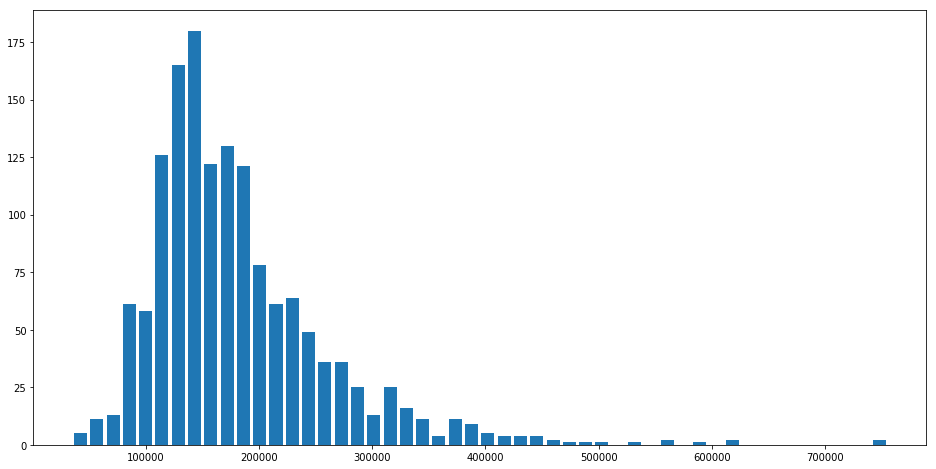

In [22]:
#ヒストグラム：SalePrice
var='SalePrice'
plt.figure(figsize=(16,8)) #figsize調整
plt.hist( df_train[var],bins=50,rwidth=0.8)

(array([  1.,   0.,   1.,   0.,   0.,   4.,   0.,   1.,   0.,   2.,   0.,
          0.,   0.,   2.,   2.,   1.,   0.,   0.,   1.,   0.,  10.,   0.,
          0.,   2.,   1.,   0.,   2.,  17.,   4.,   1.,   7.,  18.,   1.,
          7.,  33.,   6.,  15.,   7.,  16.,  12.,   7.,   4.,  15.,   4.,
          3.,   6.,   9.,   9.,   8.,  18.,  17.,   0.,   6.,   7.,   5.,
         26.,  20.,  11.,  12.,  24.,  30.,  20.,  24.,  43.,  14.,  35.,
         15.,  24.,  34.,  22.,  14.,  46.,  23.,  21.,   8.,  33.,  48.,
          9.,  15.,   6.,   4.,  14.,   5.,   3.,  14.,  12.,  18.,  17.,
         19.,  33.,  14.,  25.,  49.,  20.,  68.,  54.,  64., 116.,  23.,
         19.]),
 array([1872.  , 1873.38, 1874.76, 1876.14, 1877.52, 1878.9 , 1880.28,
        1881.66, 1883.04, 1884.42, 1885.8 , 1887.18, 1888.56, 1889.94,
        1891.32, 1892.7 , 1894.08, 1895.46, 1896.84, 1898.22, 1899.6 ,
        1900.98, 1902.36, 1903.74, 1905.12, 1906.5 , 1907.88, 1909.26,
        1910.64, 1912.02, 1913.4 ,

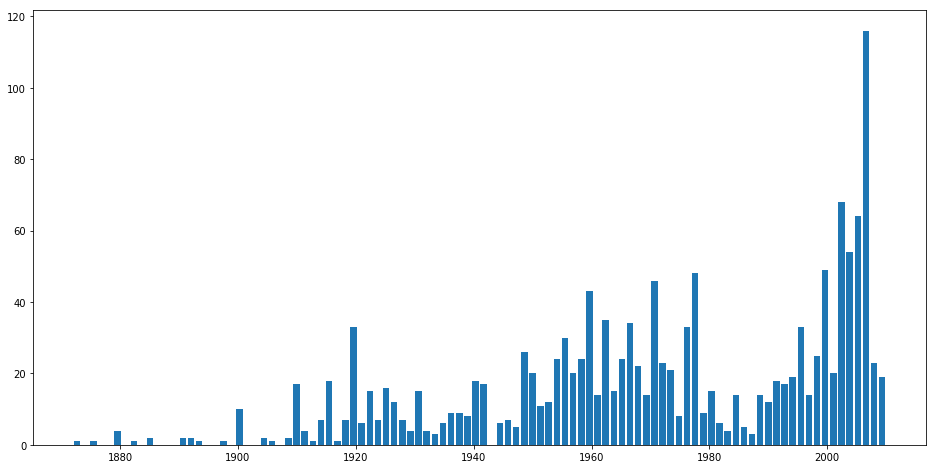

In [23]:
#棒グラフ：YearBuilt
var='YearBuilt'
plt.figure(figsize=(16,8))
plt.hist( df_train[var],bins=100,rwidth=0.8)

In [24]:
#クロス集計：OverallCond × SaleCondition
pd.crosstab(df_train.OverallCond, df_train.SaleCondition)

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
OverallCond,,,,,,
1,0,0,0,0,1,0
2,2,0,0,0,2,1
3,5,1,1,0,18,0
4,5,0,1,2,49,0
5,51,2,7,13,628,120
6,18,1,1,2,227,3
7,19,0,2,2,182,0
8,0,0,0,1,70,1
9,1,0,0,0,21,0


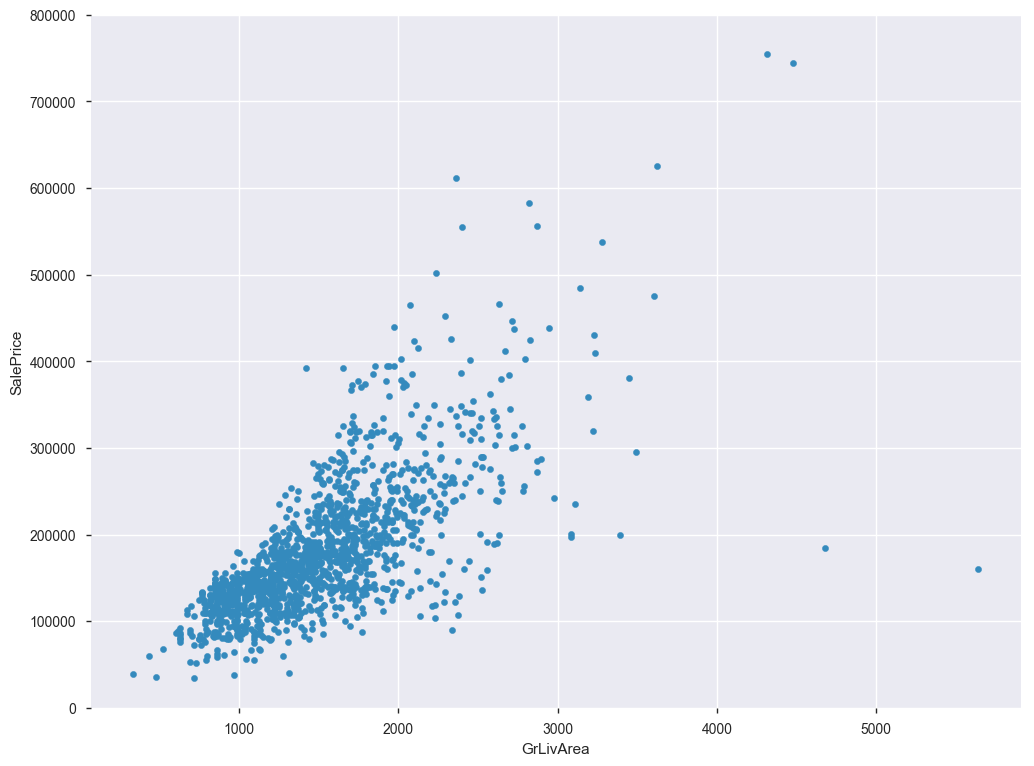

In [56]:
#散布図：GrLivArea×SalePrice
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000),figsize=(12,9))

# 演習問題

In [25]:
#演習①　基本統計量：GrLivArea
df_train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

(array([  2.,   2.,   8.,  15.,  80.,  93., 105., 108., 119., 129., 127.,
        114., 128., 101.,  65.,  65.,  46.,  29.,  27.,  22.,  18.,  19.,
          8.,   9.,   3.,   2.,   3.,   4.,   1.,   2.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 334.  ,  440.16,  546.32,  652.48,  758.64,  864.8 ,  970.96,
        1077.12, 1183.28, 1289.44, 1395.6 , 1501.76, 1607.92, 1714.08,
        1820.24, 1926.4 , 2032.56, 2138.72, 2244.88, 2351.04, 2457.2 ,
        2563.36, 2669.52, 2775.68, 2881.84, 2988.  , 3094.16, 3200.32,
        3306.48, 3412.64, 3518.8 , 3624.96, 3731.12, 3837.28, 3943.44,
        4049.6 , 4155.76, 4261.92, 4368.08, 4474.24, 4580.4 , 4686.56,
        4792.72, 4898.88, 5005.04, 5111.2 , 5217.36, 5323.52, 5429.68,
        5535.84, 5642.  ]),
 <a list of 50 Patch objects>)

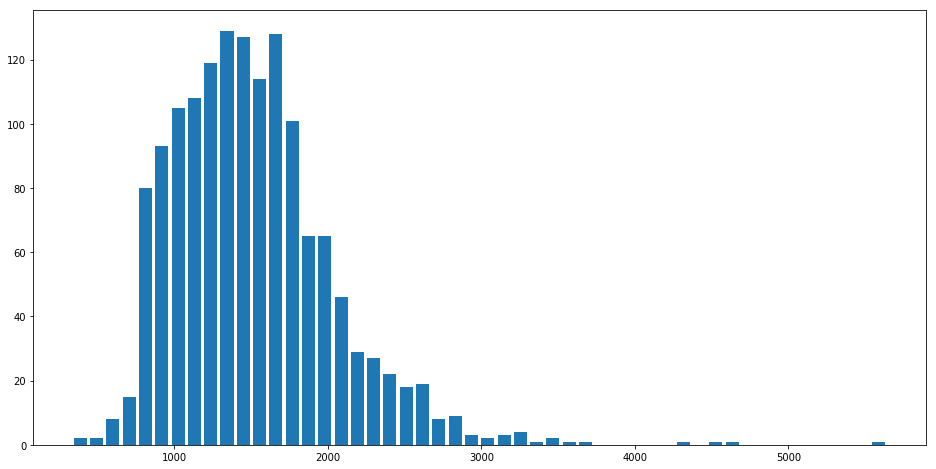

In [26]:
#演習②　ヒストグラム：GrLivArea
var='GrLivArea'
plt.figure(figsize=(16,8)) #figsize調整
plt.hist( df_train[var],bins=50,rwidth=0.8)

(array([ 58.,  52., 106., 141., 204., 253., 234., 122.,  63.,  89.,  79.,
         59.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

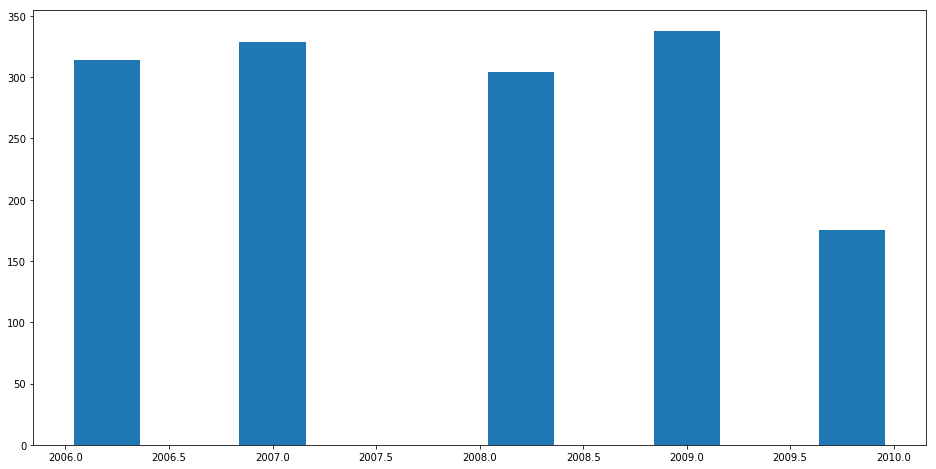

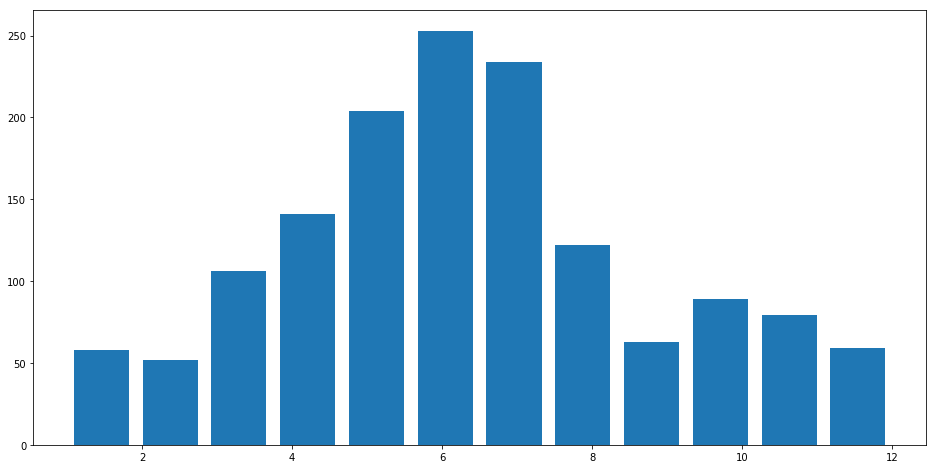

In [34]:
#演習③　棒グラフ：YrSold、MoSold
var='YrSold'
plt.figure(figsize=(16,8))
plt.hist( df_train[var],bins=10,rwidth=0.8)
var='MoSold'
plt.figure(figsize=(16,8))
plt.hist( df_train[var],bins=12,rwidth=0.8)

In [35]:
#演習④　クロス集計：OverallCond × YrSold
pd.crosstab(df_train.OverallCond, df_train.YrSold)

YrSold,2006,2007,2008,2009,2010
OverallCond,,,,,
1,0,0,0,1,0
2,1,1,0,1,2
3,5,4,3,11,2
4,20,9,7,15,6
5,192,189,160,186,94
6,44,58,59,63,28
7,37,52,49,35,32
8,13,14,17,19,9
9,2,2,9,7,2


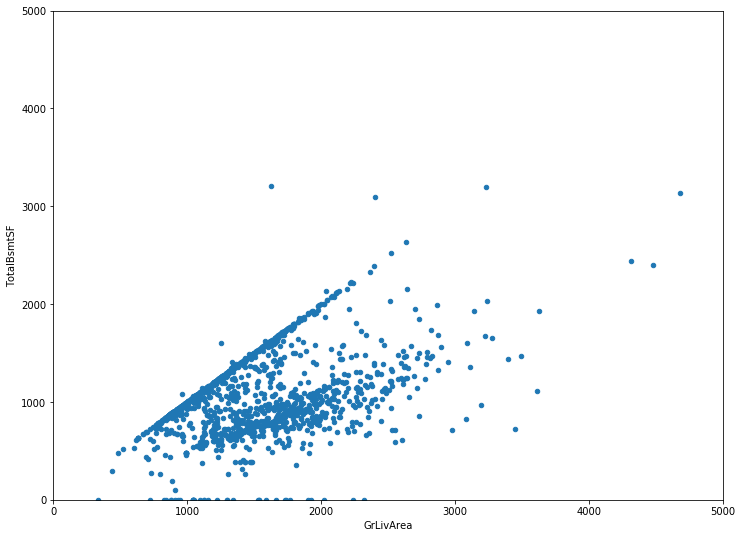

In [49]:
#演習⑤　散布図：GrLivArea×TotalBsmtSF
data = pd.concat([df_train['GrLivArea'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='GrLivArea', y='TotalBsmtSF', xlim = (0, 5000), ylim=(0,5000),figsize=(12,9))

In [51]:
import pandas_profiling as pdp

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [53]:
pdp.ProfileReport(df_train)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0
